# Import Libraries

In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd

# For Math Operations & Stats
import math
from scipy import stats

#For Data Visualisation
import matplotlib.pyplot as plt                # DON'T FORGET THE .pyplot part
import matplotlib.dates as dates
from matplotlib import offsetbox
%matplotlib inline

import seaborn as sns
sns.set(style='dark')

#For Machine Learning
from sklearn import manifold, datasets, decomposition

#For Dimension Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#For scaling data
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids     #Run '!pip install scikit-learn-extra' if not in library

#Silhouette score
from sklearn.metrics import silhouette_score

#Progress Bar
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

# Analysing Car Dataset
## Load Data

In [2]:
car_data = pd.read_csv("auto-mpg.csv")

In [3]:
car_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
5,15.0,8,429.0,198,4341,10.0,70,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,amc ambassador dpl


## Explore the Data

In [4]:
car_data.shape

(398, 8)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
pd.DataFrame(car_data.nunique(),columns=['Unique Values'])

,Unique Values
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
car name,305


Checking values in horsepower column

In [7]:
car_data['horsepower'][~car_data['horsepower'].str.isdigit()]

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [8]:
car_data[car_data.duplicated()]    #Check duplicate entries

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name


### Observation

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower should be a numeric data type. We will explore this further.

# Data Prep

## Drop 'car_name' Column

In [9]:
car_data1 = car_data.copy(deep=True)
car_data = car_data.drop(['car name'], axis=1)
car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


## Fill Missing Horse Power Data

In [10]:
hp_missing_data=car_data[['model year','cylinders','horsepower']][~car_data['horsepower'].str.isdigit()].copy(deep=True)
hp_missing_data

,model year,cylinders,horsepower
32,71,4,?
126,74,6,?
330,80,4,?
336,80,4,?
354,81,4,?
374,82,4,?


In [11]:
car_data[['model year','cylinders','horsepower']][car_data['horsepower'].str.isdigit()]

,model year,cylinders,horsepower
0,70,8,130
1,70,8,165
2,70,8,150
3,70,8,150
4,70,8,140
...,...,...,...
393,82,4,86
394,82,4,52
395,82,4,84
396,82,4,79


In [12]:
car_data[['model year','cylinders','horsepower']][car_data['horsepower'].str.isdigit()]

,model year,cylinders,horsepower
0,70,8,130
1,70,8,165
2,70,8,150
3,70,8,150
4,70,8,140
...,...,...,...
393,82,4,86
394,82,4,52
395,82,4,84
396,82,4,79


In [13]:
hp_medians = car_data[['model year','cylinders','horsepower']][car_data['horsepower'].str.isdigit()].groupby(['model year','cylinders']).median().copy(deep=True)
hp_medians=hp_medians.reset_index()
hp_medians.head(5)

,model year,cylinders,horsepower
0,70,4,90.0
1,70,6,92.5
2,70,8,191.5
3,71,4,74.0
4,71,6,100.0


In [14]:
for i in range(len(hp_missing_data)):
    car_data['horsepower'].loc[hp_missing_data.index[i]]=list(hp_medians['horsepower'][(hp_medians['model year']==hp_missing_data['model year'].loc[hp_missing_data.index[i]])&
                            (hp_medians['cylinders']==hp_missing_data['cylinders'].loc[hp_missing_data.index[i]])])[0]

car_data.loc[hp_missing_data.index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,74.0,2046,19.0,71
126,21.0,6,200.0,100.0,2875,17.0,74
330,40.9,4,85.0,72.0,1835,17.3,80
336,23.6,4,140.0,72.0,2905,14.3,80
354,34.5,4,100.0,71.0,2320,15.8,81
374,23.0,4,151.0,84.0,3035,20.5,82


In [15]:
car_data['horsepower']=car_data['horsepower'].astype(float)

In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


## Create a Copy of Scaled Data

In [17]:
scaler=StandardScaler()
car_data_scaled=pd.DataFrame(scaler.fit_transform(car_data), columns=car_data.columns)
car_data_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.676682,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.590513,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.198871,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.198871,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.937776,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.472136,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.359858,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.524354,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.654902,-0.408411,1.100822,1.621983


# Statistics

In [18]:
np.round(car_data.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.515,7.816,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.455,1.701,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.426,104.270,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.083,38.348,46.0,75.000,92.0,125.000,230.0
weight,398.0,2970.425,846.842,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568,2.758,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010,3.698,70.0,73.000,76.0,79.000,82.0


## Observation

- The average mileage is approx 23.5 miles per gallon.
- The average number of cylinders is approx 5
- The average displacement is approx 193 cubic inches with a standard deviation of approx 104 cubic inches.
- The average horsepower is 104.
- The average weight is approx 2970 lbs.
- The average acceleration is approx 15 sec for reaching 0 to 60 mph speed.
- The model year ranges from 1970 to 1982.

In [19]:
np.round(car_data_scaled.describe(),4).T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,0.0,1.0013,-1.8594,-0.7705,-0.0659,0.7027,2.9573
cylinders,398.0,-0.0,1.0013,-1.4449,-0.8563,-0.8563,1.4982,1.4982
displacement,398.0,-0.0,1.0013,-1.2044,-0.8563,-0.4314,0.6585,2.5118
horsepower,398.0,0.0,1.0013,-1.5165,-0.7593,-0.3155,0.5461,3.2876
weight,398.0,-0.0,1.0013,-1.6049,-0.8828,-0.1974,0.7538,2.5652
acceleration,398.0,0.0,1.0013,-2.7478,-0.6329,-0.0247,0.5834,3.3519
model year,398.0,-0.0,1.0013,-1.6274,-0.8151,-0.0027,0.8096,1.6220


# Visualise the Data

mpg
Skew : 0.46


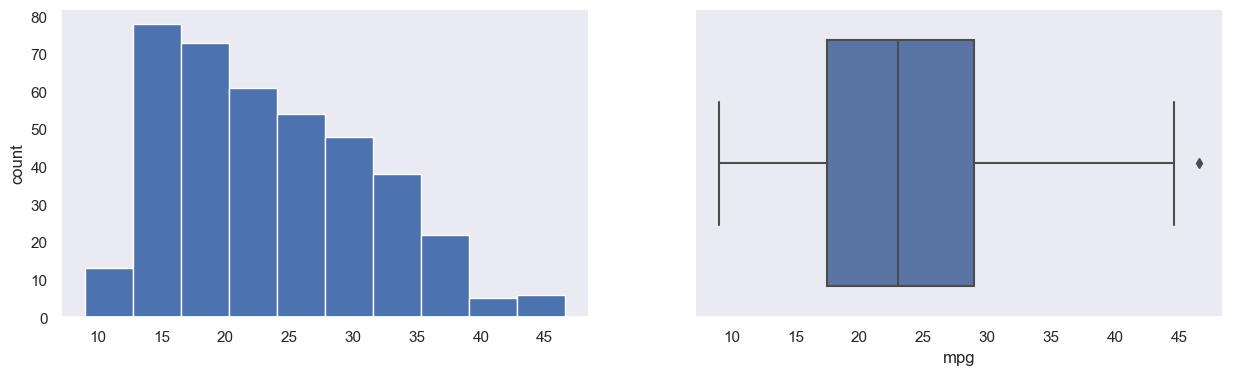

cylinders
Skew : 0.53


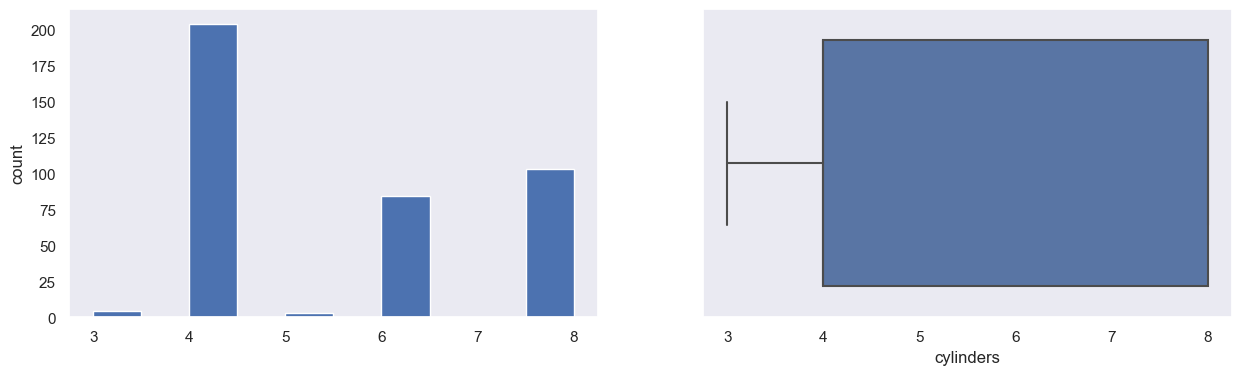

displacement
Skew : 0.72


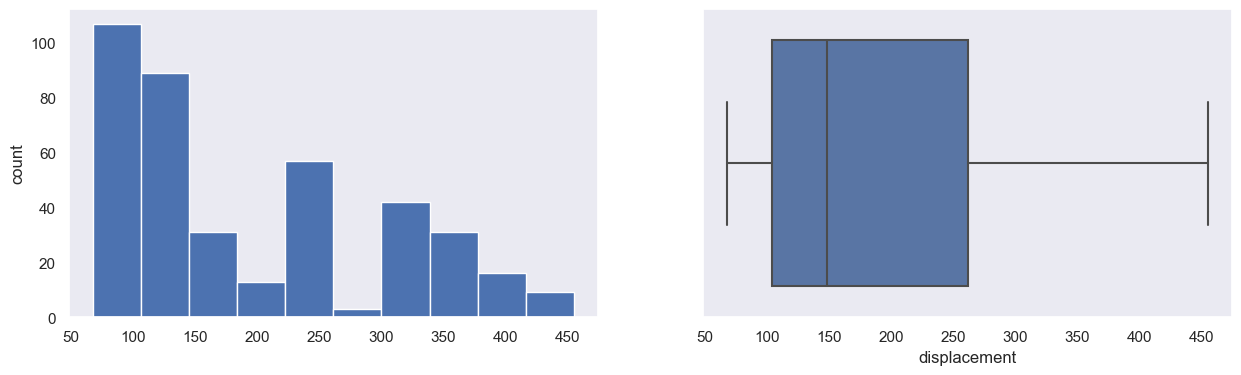

horsepower
Skew : 1.11


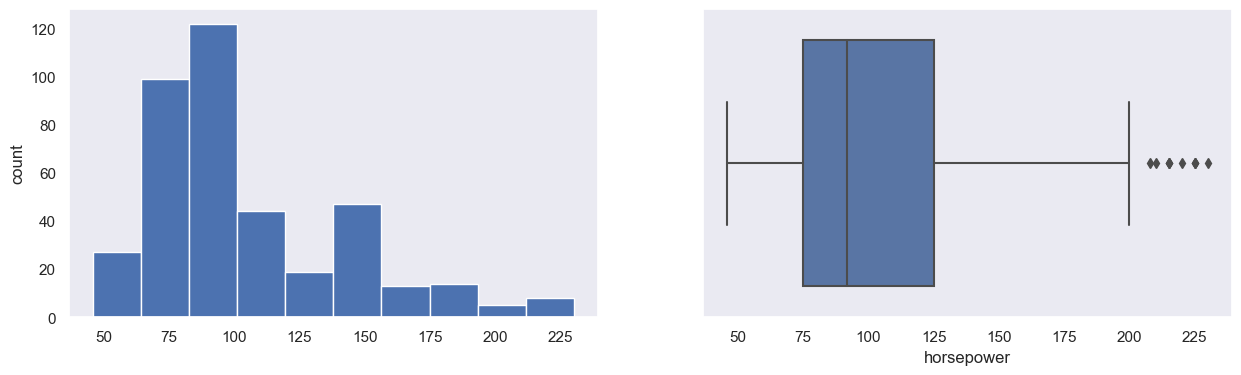

weight
Skew : 0.53


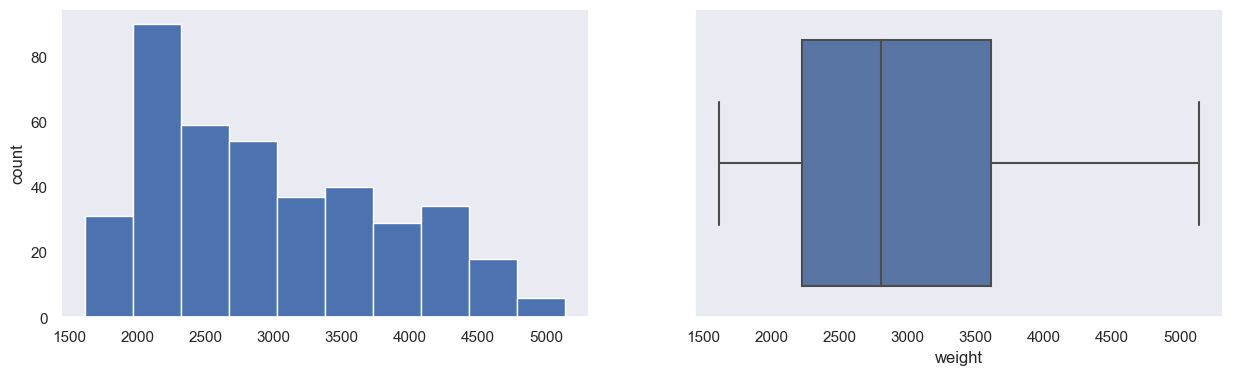

acceleration
Skew : 0.28


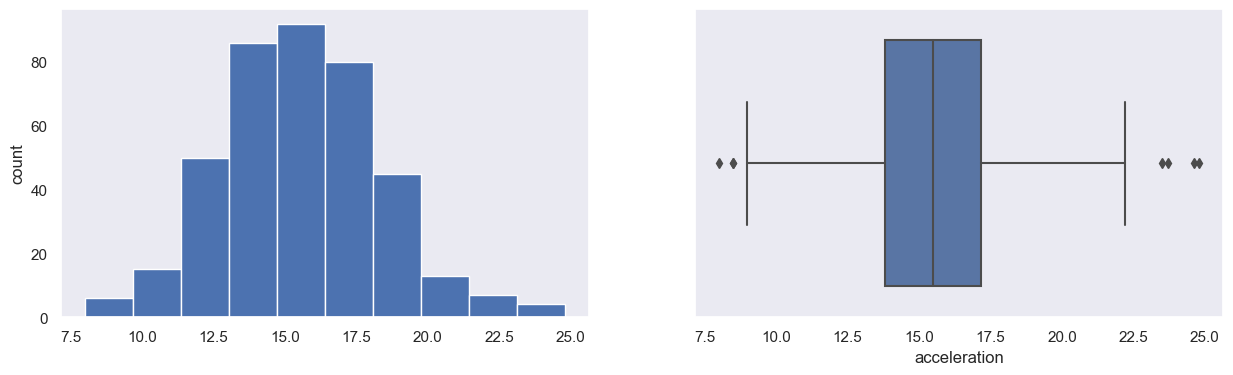

model year
Skew : 0.01


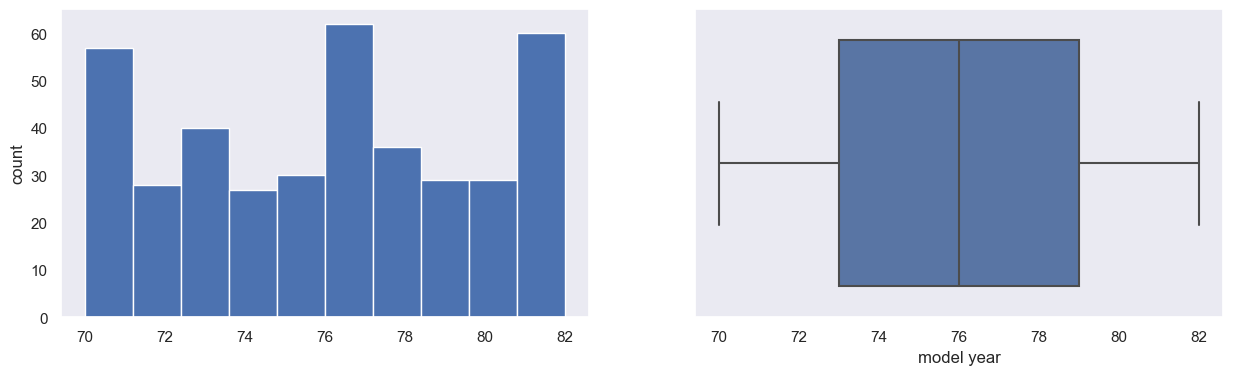

In [20]:
for col in car_data.columns:
    print(col)
    print('Skew :',round(car_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    car_data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=car_data[col])
    plt.show()

## Observations
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4.
- The acceleration is normally distributed. 
- Most number of cars are 76 or 77 year model.
- No variable has very extreme values in the data.

# Correlation Data

In [21]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.776489,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.843969,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897808,0.932824,-0.543684,-0.370164
horsepower,-0.776489,0.843969,0.897808,1.000000,0.864052,-0.687187,-0.416925
weight,-0.831741,0.896017,0.932824,0.864052,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.687187,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.416925,-0.306564,0.288137,1.000000


<Figure size 300x300 with 0 Axes>

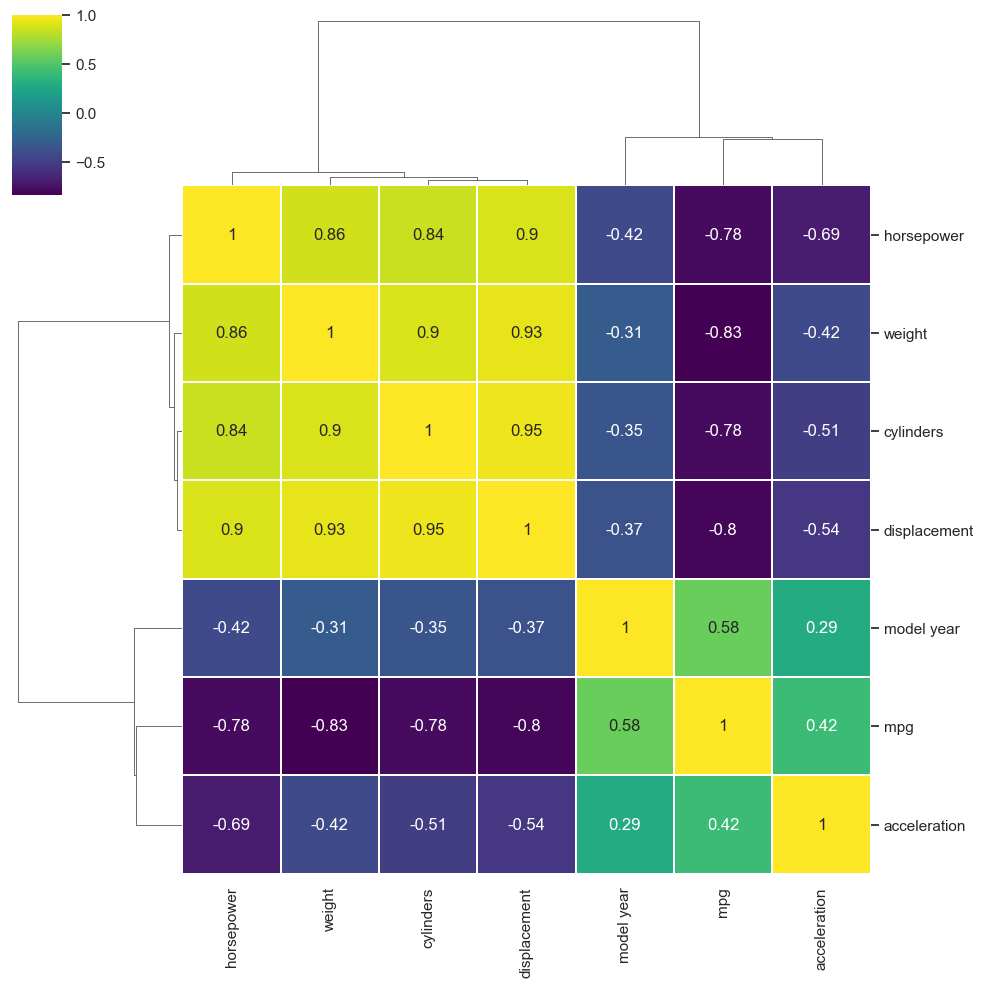

In [22]:
plt.figure(figsize=(3,3))
sns.clustermap(car_data.corr(), annot=True, cmap='viridis',lw=0.01)
plt.show()

## Observations
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

# Principal Component Analysis of Car Data

In [23]:
pc_comps=[]
for i in range(car_data.shape[1]):
    pc_comps.extend(['PC{}'.format(i+1)])
pc_comps

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

In [24]:
#Finding principal components for the data
# 'car_data_scaled.shape[1]': Number of columns
car_pca = PCA(n_components=car_data_scaled.shape[1], random_state=1)
car_data_pca = pd.DataFrame(car_pca.fit_transform(car_data_scaled), columns=pc_comps)

#The percentage of variance explained by each principal component
car_exp_var = car_pca.explained_variance_ratio_

In [25]:
car_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.662877,0.918377,-0.556883,0.737379,-0.551059,-0.100457,-0.117663
1,3.523749,0.791866,-0.667586,0.493343,-0.032967,0.200748,0.101683
2,2.999163,0.864058,-0.979653,0.714423,-0.287380,0.130502,-0.054732
3,2.938486,0.950540,-0.604191,0.530233,-0.281835,0.288858,-0.120977
4,2.931726,0.933772,-1.076985,0.556080,-0.546238,-0.003385,-0.166501
...,...,...,...,...,...,...,...
393,-1.418065,-1.224687,-0.292183,-0.672119,0.070688,-0.179229,0.101110
394,-4.090149,-1.285706,1.955252,1.378786,0.739779,0.193907,0.085566
395,-1.544396,-1.246925,-1.913707,-0.325986,-0.236220,-0.250006,0.148491
396,-2.019621,-1.134143,0.604358,-0.463696,0.195400,0.099347,0.073874


In [26]:
car_exp_var

array([0.7153434 , 0.12359716, 0.10407621, 0.02671681, 0.01739354,
       0.00785103, 0.00502186])

## PCA Expalined Variance

In [27]:
car_exp_var_df=pd.DataFrame(data=car_exp_var,index=range(1,car_data_scaled.shape[1]+1),columns=['Explained Variance'])
car_exp_var_df['Cumulative Explained Variance']=car_exp_var.cumsum()
car_exp_var_df.index.names=['Number of Components']
car_exp_var_df

,Explained Variance,Cumulative Explained Variance
Number of Components,,
1,0.715343,0.715343
2,0.123597,0.838941
3,0.104076,0.943017
4,0.026717,0.969734
5,0.017394,0.987127
6,0.007851,0.994978
7,0.005022,1.000000


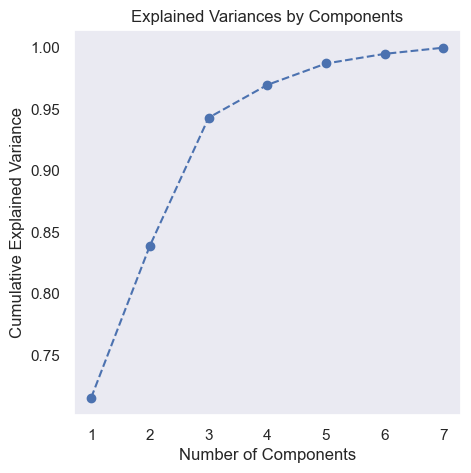

In [28]:
# visualize the explained variance by individual components
plt.figure(figsize = (5,5))
plt.plot(car_exp_var_df.index, car_exp_var_df['Cumulative Explained Variance'], marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [29]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(car_exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


### Observations
-  We can see that out of the 7 original features, we reduced the number of features through principal components to 3, these components explain more than 94% of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance.
- Let us now look at these principal components as a linear combination of original features.

## PCs (EigenVectors)

In [30]:
car_data_pca_comps = pd.DataFrame(np.round(car_pca.components_,2),index=pc_comps,columns=car_data_scaled.columns)
car_data_pca_comps.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mpg,-0.40,-0.21,-0.26,0.75,0.33,-0.22,-0.09
cylinders,0.42,-0.19,0.14,0.48,-0.49,0.33,-0.43
displacement,0.43,-0.18,0.10,0.29,-0.06,-0.15,0.81
horsepower,0.42,-0.09,-0.17,-0.03,0.72,0.52,-0.06
weight,0.41,-0.22,0.28,-0.11,0.26,-0.70,-0.37
acceleration,-0.28,0.02,0.89,0.13,0.23,0.22,0.05
model year,-0.23,-0.91,-0.02,-0.30,-0.09,0.14,0.05


In [31]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
car_data_pca_comps.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mpg,-0.400000,-0.210000,-0.260000,0.750000,0.330000,-0.220000,-0.090000
cylinders,0.420000,-0.190000,0.140000,0.480000,-0.490000,0.330000,-0.430000
displacement,0.430000,-0.180000,0.100000,0.290000,-0.060000,-0.150000,0.810000
horsepower,0.420000,-0.090000,-0.170000,-0.030000,0.720000,0.520000,-0.060000
weight,0.410000,-0.220000,0.280000,-0.110000,0.260000,-0.700000,-0.370000
acceleration,-0.280000,0.020000,0.890000,0.130000,0.230000,0.220000,0.050000
model year,-0.230000,-0.910000,-0.020000,-0.300000,-0.090000,0.140000,0.050000


In [32]:
car_data_pca_comps.T.iloc[:,0:3].style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


### Observations
- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

-0.40 * mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 * acceleration - 0.23 * model year

- The first principal component, PC1, is a measure of mpg, cylinders, displacement, horsepower, and weight. PC1 is associated with high scores of all these variables, except mpg, as these variables have positive weights. PC1 is associated with low values of mpg. This principal component seems to capture attributes that generally define cars with heavy engines with high number of cylinders, displacement, horsepower and weight and a a result of heavy engines such cars would have low mileage.
- The second principal component, PC2, is a measure of model year. PC2 is associated with low values of model year.
- The third principal component, PC3, is a measure of the acceleration.

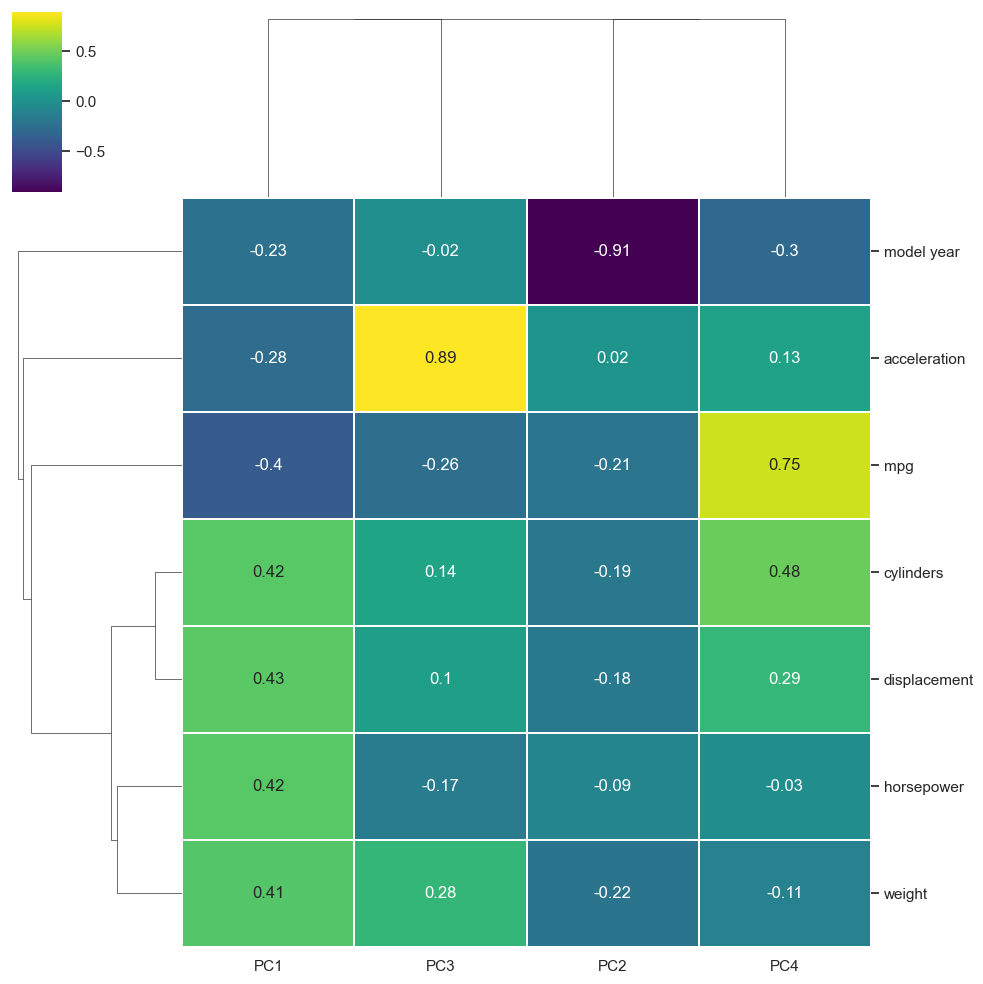

In [33]:
sns.clustermap(car_data_pca_comps.T.iloc[:,0:4],cmap='viridis',lw=0.01,annot=True)

## Visualise PCA using First two PCs

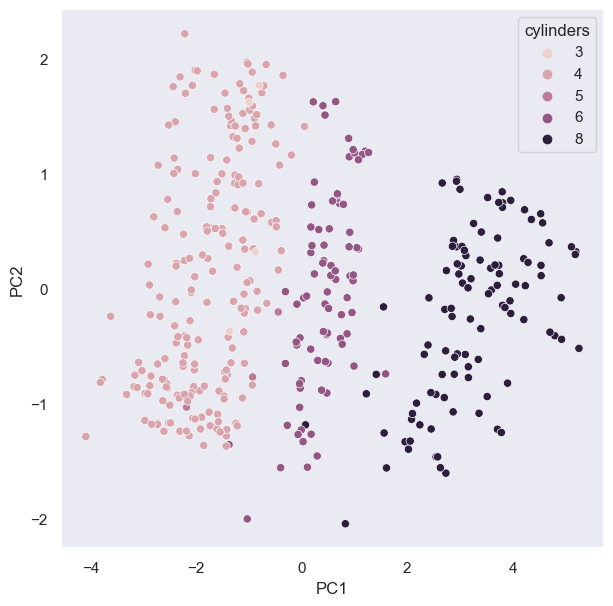

In [34]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_pca['PC1'],y=car_data_pca['PC2'],hue=car_data['cylinders'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Observations

- We can see there are 3 groups:
    - One with 3, 4, or 5 number of cylinders
    - One with 6 numbers of cylinders
    - One with 8 number of cylinders
- However, the distinction between the groups is not strong and there are some overlaps.

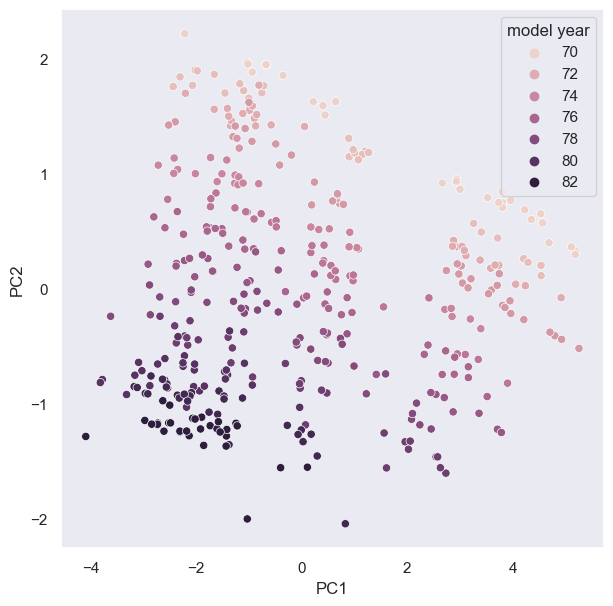

In [35]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_pca['PC1'],y=car_data_pca['PC2'],hue=car_data['model year'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

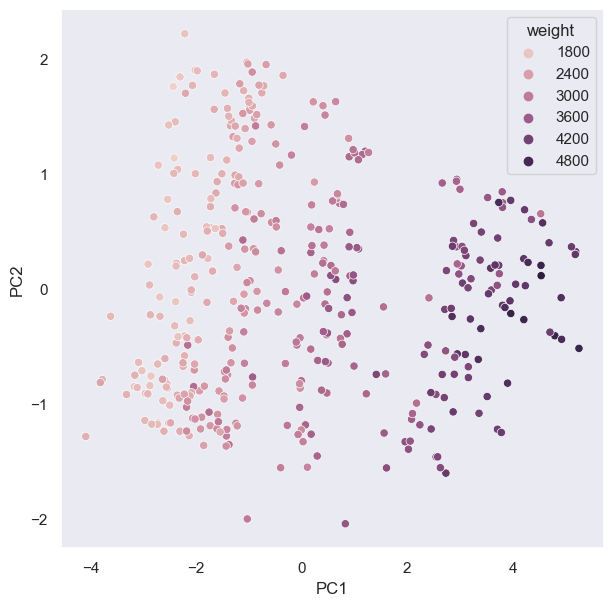

In [36]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_pca['PC1'],y=car_data_pca['PC2'],hue=car_data['weight'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE

In [37]:
car_tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
car_data_tsne = pd.DataFrame(car_tsne.fit_transform(car_data_scaled))
car_data_tsne

,0,1
0,36.762844,-2.210301
1,37.538044,-0.315449
2,37.408318,-1.402080
3,36.798325,-1.402306
4,37.465469,-1.870014
...,...,...
393,-11.343709,5.795793
394,-12.668326,18.240074
395,-15.649274,6.690965
396,-9.476442,9.036499


In [38]:
car_tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
car_data_tsne_pca = pd.DataFrame(car_tsne.fit_transform(car_data_pca))
car_data_tsne_pca

,0,1
0,36.762844,-2.210301
1,37.538044,-0.315449
2,37.408318,-1.402080
3,36.798325,-1.402306
4,37.465469,-1.870014
...,...,...
393,-11.343709,5.795793
394,-12.668326,18.240074
395,-15.649274,6.690965
396,-9.476442,9.036499


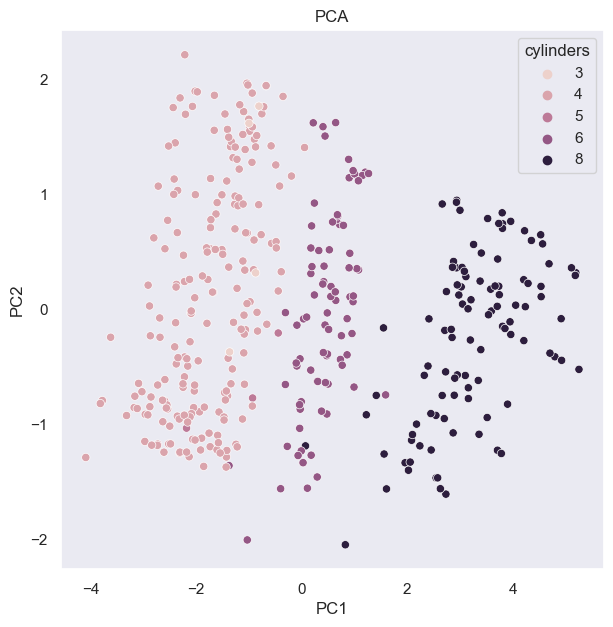

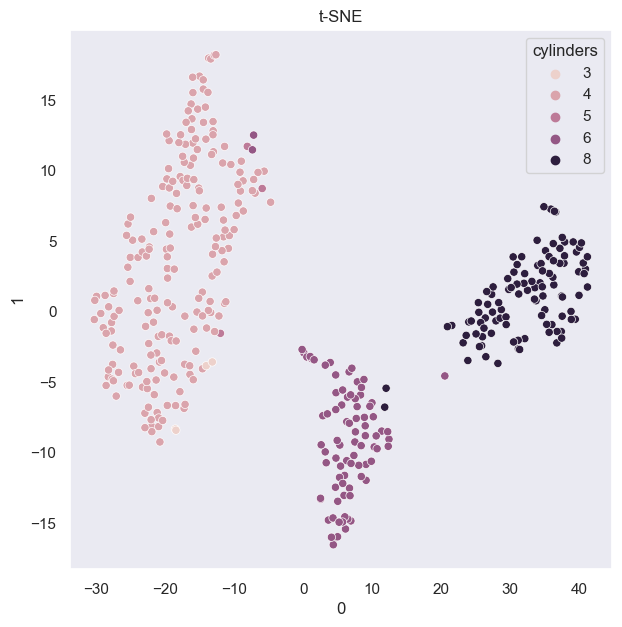

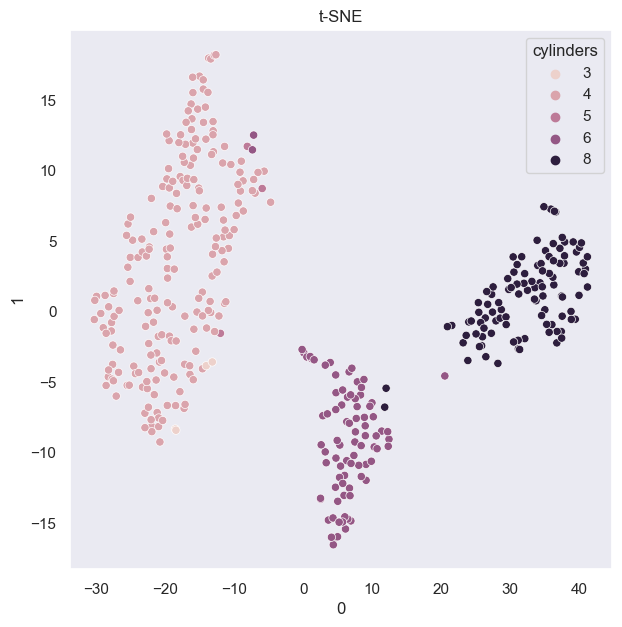

In [39]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_pca['PC1'],y=car_data_pca['PC2'],hue=car_data['cylinders'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA')
plt.show()

plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_tsne[0],y=car_data_tsne[1],hue=car_data['cylinders'])
plt.title('t-SNE')
plt.show()

plt.figure(figsize = (7,7))
sns.scatterplot(x=car_data_tsne_pca[0],y=car_data_tsne_pca[1],hue=car_data['cylinders'])
plt.title('t-SNE')
plt.show()

# Clustering

In [40]:
#Creating copy of the data to store labels from each algorithm
car_data_scaled_copy = car_data_scaled.copy(deep=True)
car_data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.676682,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.590513,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.198871,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.198871,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.937776,0.565841,-1.840117,-1.627426


In [41]:
WCSS = {}    #Empty dictionary to store the SSE for each value of k

# iterate for a range of Ks and fit the scaled data to the algorithm
# Use inertia attribute from the clustering object and store the inertia value for that k
# Store the Silhouette score for that k

for k in range(1, 10):
    car_kmeans = KMeans(n_clusters=k,random_state=1).fit(car_data_scaled)
    labels = car_kmeans.predict(car_data_scaled)
    WCSS[k] =  car_kmeans.inertia_

In [42]:
sc = {}      #Empty dictionary to store the Silhouette score for each value of k

# iterate for a range of Ks and fit the scaled data to the algorithm
# Store the Silhouette score for that k
for k in range(2, 10):
    car_kmeans = KMeans(n_clusters=k,random_state=1).fit(car_data_scaled)
    labels = car_kmeans.predict(car_data_scaled)
    sc[k]  = silhouette_score(car_data_scaled, labels)      

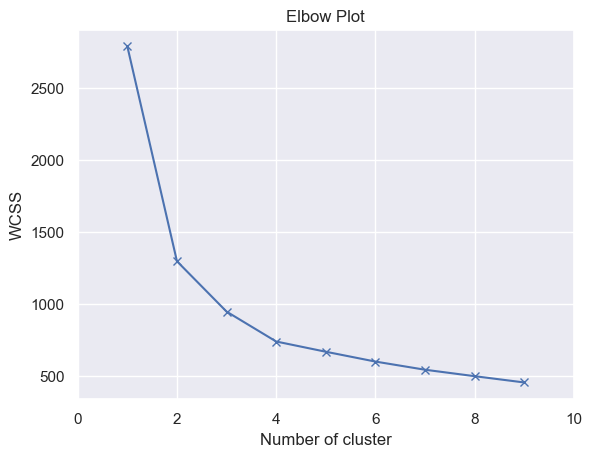

In [43]:
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.title('Elbow Plot')
plt.xlim(0,10)
plt.grid()

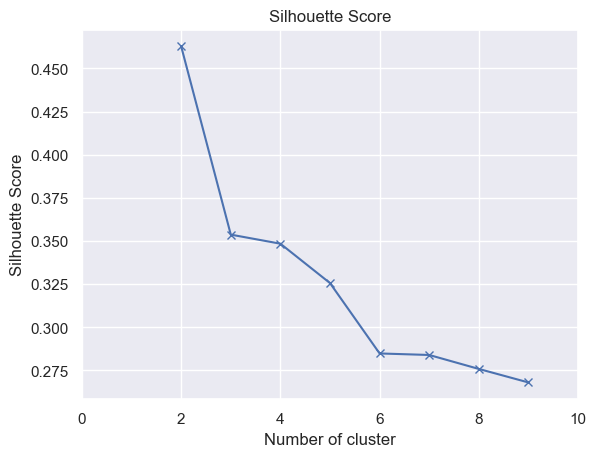

In [44]:
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score')
plt.xlim(0,10)
plt.grid()

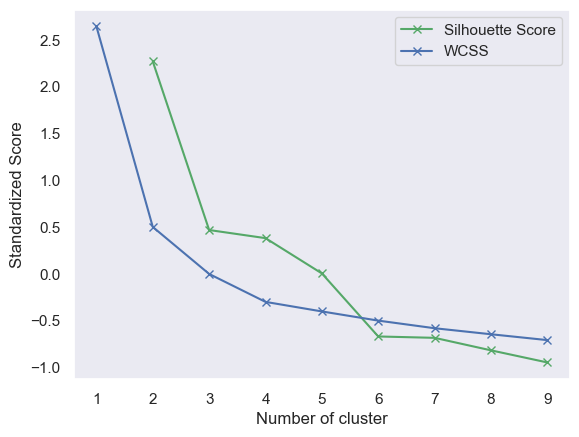

In [45]:
plt.figure()
plt.plot(list(sc.keys()), list(scaler.fit_transform(np.array(list(sc.values())).reshape(-1, 1)).reshape(1,len(sc))[0]), 'gx-', label='Silhouette Score')
plt.plot(list(WCSS.keys()), list(scaler.fit_transform(np.array(list(WCSS.values())).reshape(-1, 1)).reshape(1,len(WCSS))[0]), 'bx-',label='WCSS')
plt.xlabel("Number of cluster")
plt.ylabel("Standardized Score")
plt.legend()
plt.show()

KMeans(n_clusters=3, random_state=2)


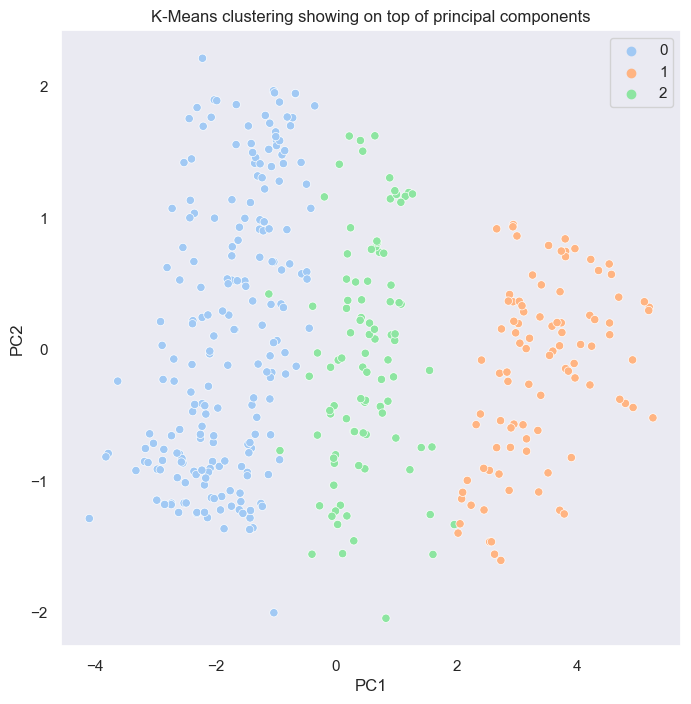

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,

In [46]:
car_kmeans = KMeans(n_clusters=3,random_state=2).fit(car_data_pca)
print(car_kmeans)
plt.figure(figsize=(8,8))
x = car_data_pca.loc[:,'PC1']
y = car_data_pca.loc[:,'PC2']
sns.scatterplot(x,y,palette='pastel',hue=car_kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means clustering showing on top of principal components')
plt.show()
car_kmeans.labels_

KMeans(n_clusters=3, random_state=2)


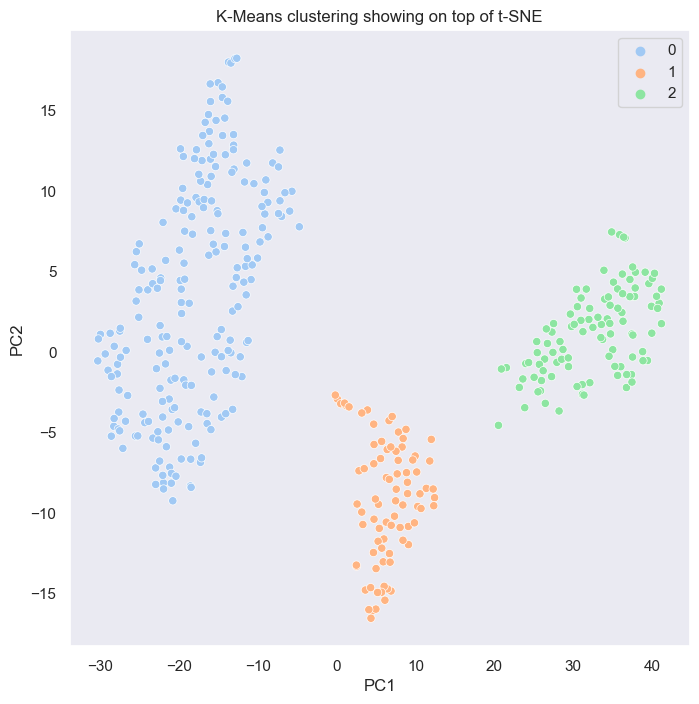

In [47]:
car_kmeans = KMeans(n_clusters=3,random_state=2).fit(car_data_tsne)
print(car_kmeans)
plt.figure(figsize=(8,8))
x = car_data_tsne.loc[:,0]
y = car_data_tsne.loc[:,1]
sns.scatterplot(x,y,palette='pastel',hue=car_kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means clustering showing on top of t-SNE')
plt.show()

In [48]:
car_data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)
car_kmeans.labels_

NameError: name 'kmeans' is not defined